### Meal Event Exploration

* Distribution of start_to_peak, peak_to_end per meal event
* Distribution of start_to_peak, peak_to_end per meal event by morning ((0-12]) and afternoon [13-24]
* Distribution of peak_glucose per meal event
* Distribution of peak_glucose by time period per meal event
* Distribution of excursion_size per meal event
* Distribution of excursion_size by time period per meal event
* Distribution of excursion rate by time period per meal event

### Load packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import os
import datetime
import calendar
import math
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import warnings; warnings.simplefilter('ignore')
import pydata_google_auth as pgauth
from google.cloud import bigquery
creds = pgauth.get_user_credentials(['https://www.googleapis.com/auth/cloud-platform'])

%matplotlib inline

/opt/anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Distribution of start_to_peak, peak_to_end per patient

In [2]:
sql_script="""
SELECT
  pim_id,
  duration as start_to_normal,
  time_to_peak AS start_to_peak,
  TIMESTAMP_DIFF(return_to_baseline_datetime_local,peak_datetime_local, MINUTE) AS peak_to_end
FROM
  odp_level2_feature_store.meal_events
"""

In [3]:
time=pd.read_gbq(sql_script,\
                             'research-01-217611', dialect='standard')

In [4]:
time.shape

(1999429, 4)

**start to normal**

In [5]:
time['start_to_normal'].median()

160.0

In [6]:
time['start_to_normal'].std()

64.5708956960164

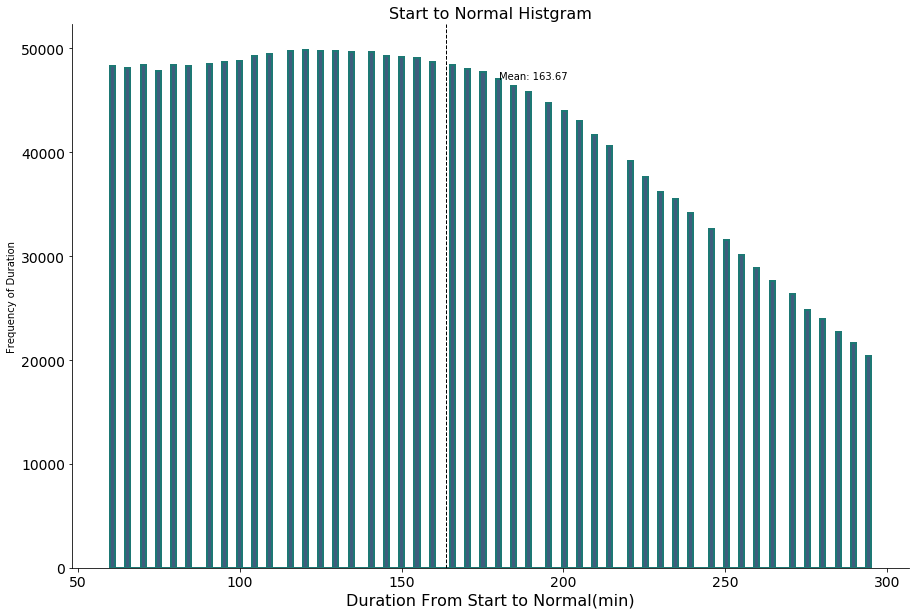

In [7]:
Days=time['start_to_normal']
plt.figure(figsize=(15, 10)) 
plt.hist(Days, range=(np.min(Days),np.max(Days)),
         linewidth=2,color="#3F5D7D",bins=150, edgecolor='#1d7874')
plt.axvline(Days.mean(), color='k', linestyle='dashed', linewidth=1)
_, max_ = plt.ylim()
plt.text(Days.mean() + Days.mean()/10, 
         max_ - max_/10, 
         'Mean: {:.2f}'.format(Days.mean()))
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.title('Start to Normal Histgram', fontsize=16)
plt.xlabel('Duration From Start to Normal(min)', fontsize=16)
plt.ylabel('Frequency of Duration');

**start to peak**

In [8]:
time['start_to_peak'].median()

60.0

In [9]:
time['start_to_peak'].std()

56.28527005403798

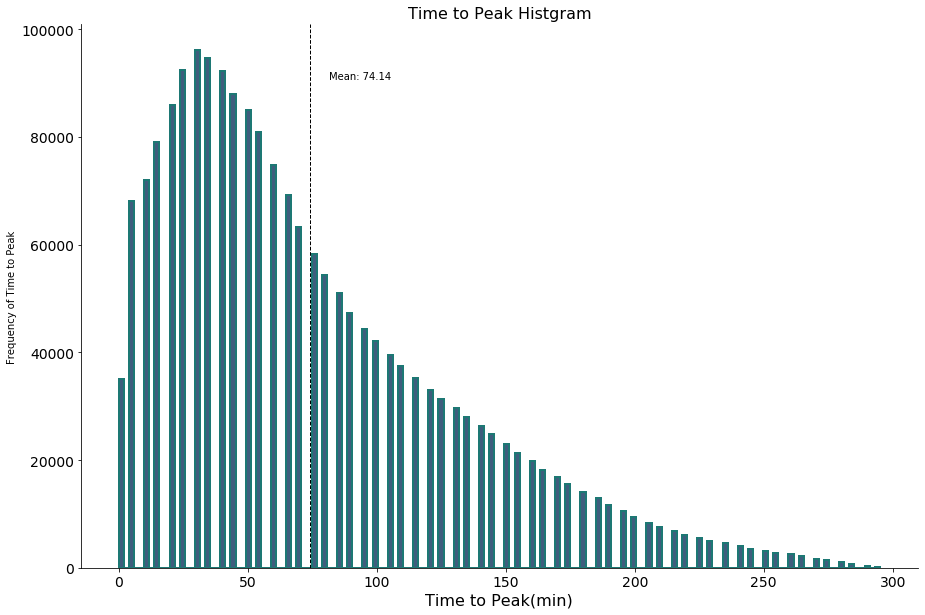

In [10]:
Days=time['start_to_peak']
plt.figure(figsize=(15, 10)) 
plt.hist(Days, range=(np.min(Days),np.max(Days)),
         linewidth=2,color="#3F5D7D",bins=150, edgecolor='#1d7874')
plt.axvline(Days.mean(), color='k', linestyle='dashed', linewidth=1)
_, max_ = plt.ylim()
plt.text(Days.mean() + Days.mean()/10, 
         max_ - max_/10, 
         'Mean: {:.2f}'.format(Days.mean()))
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.title('Time to Peak Histgram', fontsize=16)
plt.xlabel('Time to Peak(min)', fontsize=16)
plt.ylabel('Frequency of Time to Peak');

**peak to end**

In [11]:
time['peak_to_end'].median()

80.0

In [12]:
time['peak_to_end'].std()

59.89914757636364

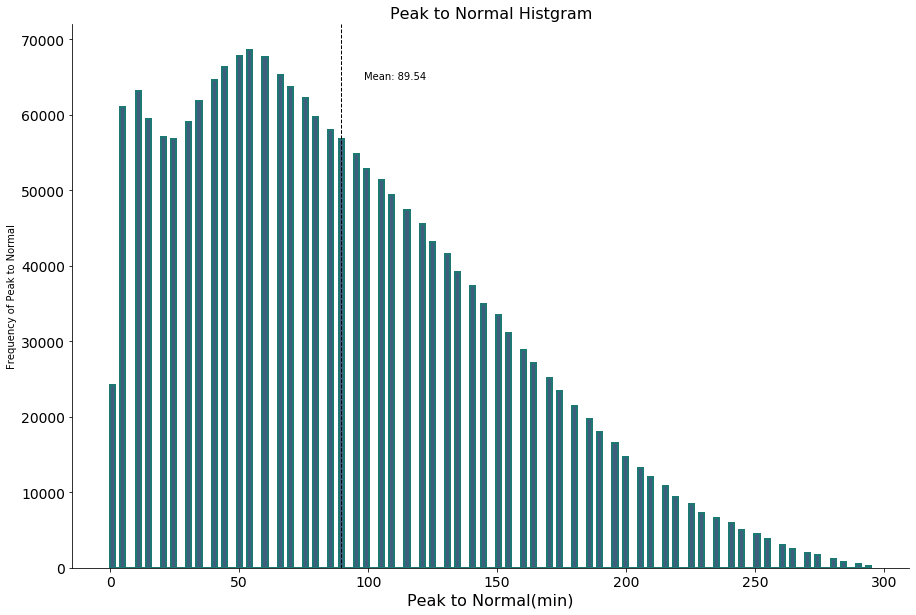

In [13]:

Days=time['peak_to_end']
plt.figure(figsize=(15, 10)) 
plt.hist(Days, range=(np.min(Days),np.max(Days)),
         linewidth=2,color="#3F5D7D",bins=150, edgecolor='#1d7874')
plt.axvline(Days.mean(), color='k', linestyle='dashed', linewidth=1)
_, max_ = plt.ylim()
plt.text(Days.mean() + Days.mean()/10, 
         max_ - max_/10, 
         'Mean: {:.2f}'.format(Days.mean()))
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.title('Peak to Normal Histgram', fontsize=16)
plt.xlabel('Peak to Normal(min)', fontsize=16)
plt.ylabel('Frequency of Peak to Normal');

### Distribution of start_to_peak, peak_to_end per patient by midnight,morning,afternoon and night

In [14]:
sql_script="""
  (
  SELECT
    pim_id,
    'Sleep (0,6]' AS time_range,
    time_to_peak AS start_to_peak,
    TIMESTAMP_DIFF(return_to_baseline_datetime_local,peak_datetime_local, MINUTE) AS peak_to_end
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    EXTRACT(hour
    FROM
      start_datetime_local)<=6
    AND EXTRACT(hour
    FROM
      start_datetime_local)>0)
UNION ALL (
  SELECT
    pim_id,
    'Morning (6,12]' AS time_range,
    time_to_peak AS start_to_peak,
    TIMESTAMP_DIFF(return_to_baseline_datetime_local,peak_datetime_local, MINUTE) AS peak_to_end
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    EXTRACT(hour
    FROM
      start_datetime_local)<=12
    AND EXTRACT(hour
    FROM
      start_datetime_local)>6)
UNION ALL (
  SELECT
    pim_id,
    'Afternoon (12,18]' AS time_range,
    time_to_peak AS start_to_peak,
    TIMESTAMP_DIFF(return_to_baseline_datetime_local,peak_datetime_local, MINUTE) AS peak_to_end
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    EXTRACT(hour
    FROM
      start_datetime_local)<=18
    AND EXTRACT(hour
    FROM
      start_datetime_local)>12)
UNION ALL (
  SELECT
    pim_id,
    'Night (18,24]' AS time_range,
    time_to_peak AS start_to_peak,
    TIMESTAMP_DIFF(return_to_baseline_datetime_local,peak_datetime_local, MINUTE) AS peak_to_end
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    (EXTRACT(hour
      FROM
        start_datetime_local)<=23
      AND EXTRACT(hour
      FROM
        start_datetime_local)>18)
    OR (EXTRACT(hour
      FROM
        start_datetime_local)=0)
)
"""

In [15]:
period=pd.read_gbq(sql_script,\
                             'research-01-217611', dialect='standard')

In [16]:
period.time_range.value_counts()

Morning (6,12]       668844
Afternoon (12,18]    661053
Night (18,24]        365882
Sleep (0,6]          303650
Name: time_range, dtype: int64

Text(0, 0.5, 'Time To Peak (min)')

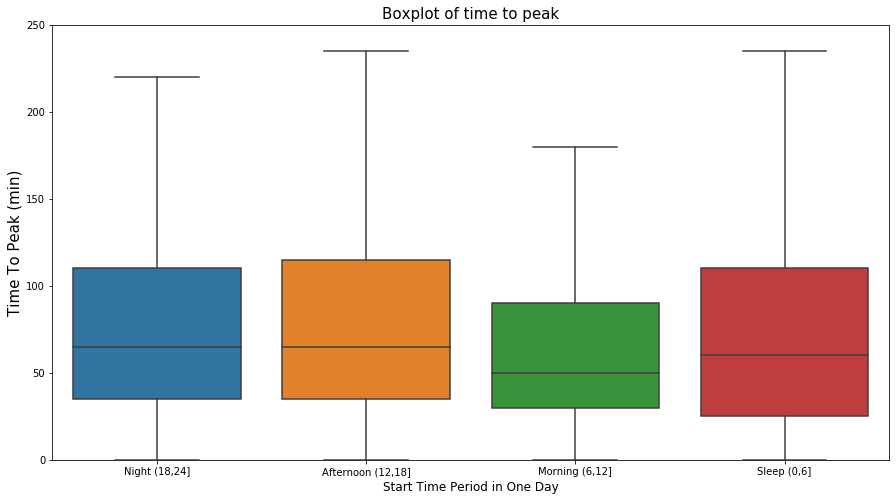

In [18]:
var = 'time_range'
#data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=var, y="start_to_peak", data=period,showfliers=False)
fig.axis(ymin=0, ymax=250);
plt.title('Boxplot of time to peak', fontsize=15)
plt.xlabel('Start Time Period in One Day', fontsize=12)
plt.ylabel('Time To Peak (min)',fontsize=15)

In [19]:
period.groupby('time_range')['start_to_peak'].mean()

time_range
Afternoon (12,18]    81.078733
Morning (6,12]       65.128146
Night (18,24]        77.597914
Sleep (0,6]          74.698288
Name: start_to_peak, dtype: float64

In [20]:
period.groupby('time_range')['start_to_peak'].median()

time_range
Afternoon (12,18]    65.0
Morning (6,12]       50.0
Night (18,24]        65.0
Sleep (0,6]          60.0
Name: start_to_peak, dtype: float64

Text(0, 0.5, 'Peak to Normal')

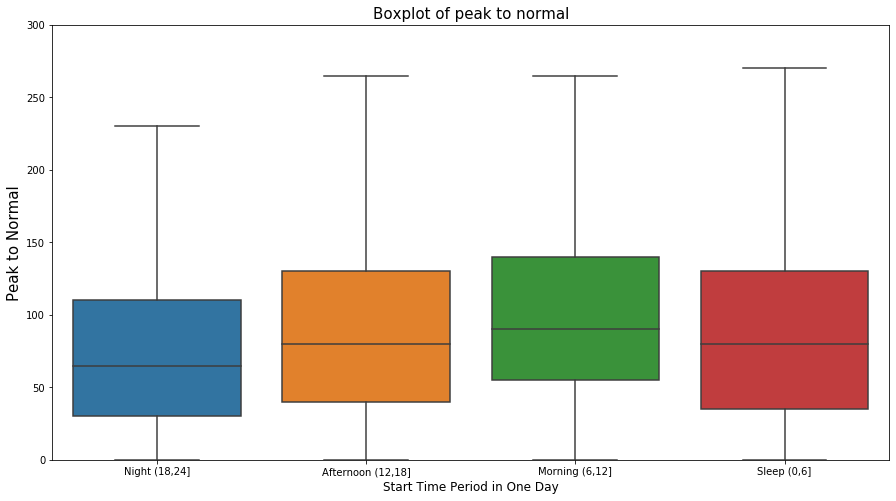

In [22]:
var = 'time_range'
#data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=var, y="peak_to_end", data=period,showfliers=False)
fig.axis(ymin=0, ymax=300);
plt.title('Boxplot of peak to normal', fontsize=15)
plt.xlabel('Start Time Period in One Day', fontsize=12)
plt.ylabel('Peak to Normal',fontsize=15)

In [23]:
period.groupby('time_range')['peak_to_end'].mean()

time_range
Afternoon (12,18]    89.024314
Morning (6,12]       98.710320
Night (18,24]        74.081316
Sleep (0,6]          89.058768
Name: peak_to_end, dtype: float64

In [24]:
period.groupby('time_range')['peak_to_end'].median()

time_range
Afternoon (12,18]    80
Morning (6,12]       90
Night (18,24]        65
Sleep (0,6]          80
Name: peak_to_end, dtype: int64

### Distribution of peak_glucose

In [25]:
sql_script="""
SELECT
    pim_id,
    peak_glucose
    from odp_level2_feature_store.meal_events
"""

In [26]:
peak=pd.read_gbq(sql_script,\
                             'research-01-217611', dialect='standard')

In [27]:
peak.peak_glucose.median()

190.0

In [28]:
peak.peak_glucose.std()

55.55038442485196

In [29]:
peak.peak_glucose.min()

41.0

In [30]:
peak.peak_glucose.max()

401.0

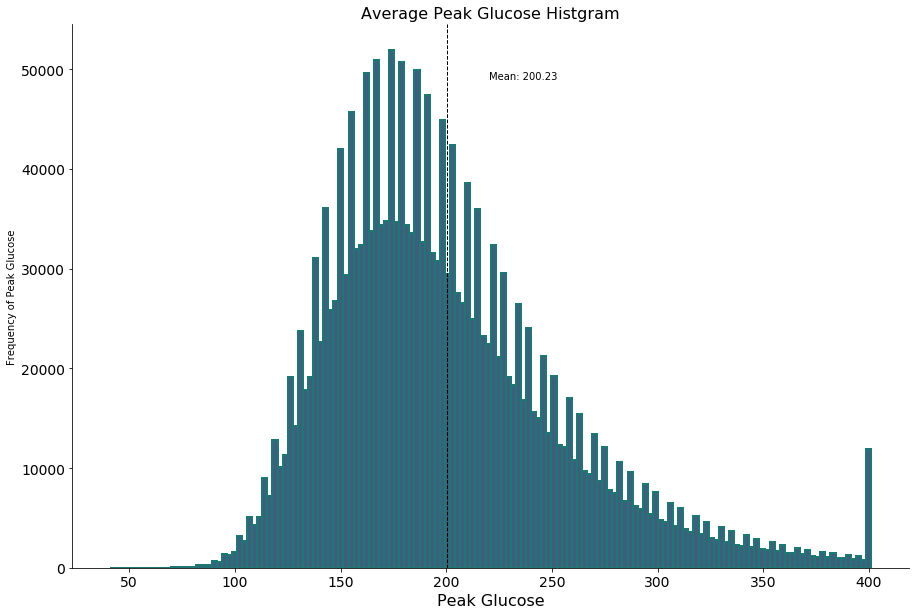

In [31]:
Days=peak['peak_glucose']
plt.figure(figsize=(15, 10)) 
plt.hist(Days, range=(np.min(Days),np.max(Days)),
         linewidth=2,color="#3F5D7D",bins=150, edgecolor='#1d7874')
plt.axvline(Days.mean(), color='k', linestyle='dashed', linewidth=1)
_, max_ = plt.ylim()
plt.text(Days.mean() + Days.mean()/10, 
         max_ - max_/10, 
         'Mean: {:.2f}'.format(Days.mean()))
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.title('Average Peak Glucose Histgram', fontsize=16)
plt.xlabel('Peak Glucose', fontsize=16)
plt.ylabel('Frequency of Peak Glucose');

In [32]:
peak.shape

(1999429, 2)

### Distribution of peak_glucose by time period

In [33]:
sql_script="""
  (
  SELECT
    pim_id,
    'Sleep (0,6]' AS time_range,
    peak_glucose
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    EXTRACT(hour
    FROM
      start_datetime_local)<=6
    AND EXTRACT(hour
    FROM
      start_datetime_local)>0
)
UNION ALL (
  SELECT
    pim_id,
    'Morning (6,12]' AS time_range,
    peak_glucose
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    EXTRACT(hour
    FROM
      start_datetime_local)<=12
    AND EXTRACT(hour
    FROM
      start_datetime_local)>6)
UNION ALL (
  SELECT
    pim_id,
    'Afternoon (12,18]' AS time_range,
    peak_glucose
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    EXTRACT(hour
    FROM
      start_datetime_local)<=18
    AND EXTRACT(hour
    FROM
      start_datetime_local)>12
)
UNION ALL (
  SELECT
    pim_id,
    'Night (18,24]' AS time_range,
    peak_glucose
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    (EXTRACT(hour
      FROM
        start_datetime_local)<=23
      AND EXTRACT(hour
      FROM
        start_datetime_local)>18)
    OR (EXTRACT(hour
      FROM
        start_datetime_local)=0))
"""

In [34]:
peak_time=pd.read_gbq(sql_script,\
                             'research-01-217611', dialect='standard')

In [35]:
peak_time.groupby('time_range')['peak_glucose'].mean()

time_range
Afternoon (12,18]    199.386407
Morning (6,12]       200.919184
Night (18,24]        207.383286
Sleep (0,6]          191.939914
Name: peak_glucose, dtype: float64

In [36]:
peak_time.groupby('time_range')['peak_glucose'].median()

time_range
Afternoon (12,18]    189.0
Morning (6,12]       192.0
Night (18,24]        197.0
Sleep (0,6]          182.0
Name: peak_glucose, dtype: float64

Text(0, 0.5, 'average peak glucose')

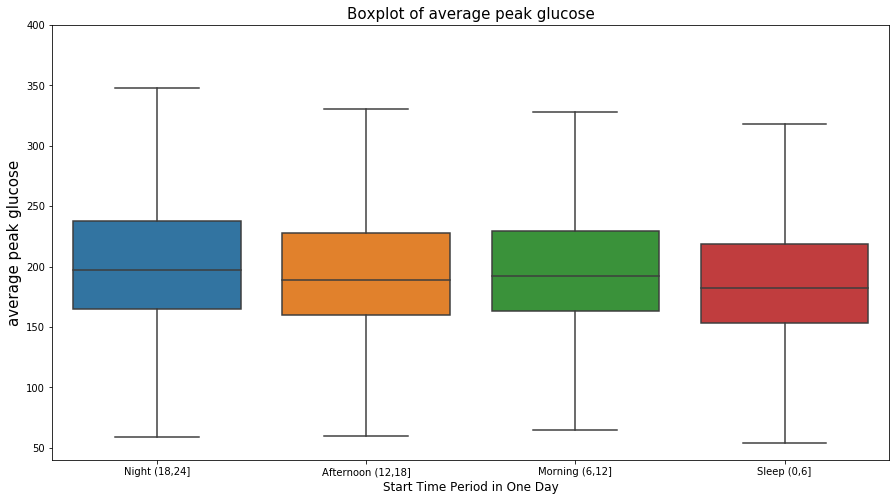

In [37]:
var = 'time_range'
#data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=var, y="peak_glucose", data=peak_time,showfliers=False)
fig.axis(ymin=40, ymax=400);
plt.title('Boxplot of average peak glucose', fontsize=15)
plt.xlabel('Start Time Period in One Day', fontsize=12)
plt.ylabel('average peak glucose',fontsize=15)

### Distribution of excursion_size

In [38]:
sql_script="""
SELECT
    pim_id,
    excursion_size
    from odp_level2_feature_store.meal_events
"""

In [39]:
excursion=pd.read_gbq(sql_script,\
                             'research-01-217611', dialect='standard')

In [40]:
excursion.excursion_size.median()

40.0

In [41]:
excursion.excursion_size.std()

35.61938149286192

In [42]:
excursion.excursion_size.min()

-0.1

In [43]:
excursion.excursion_size.max()

319.5

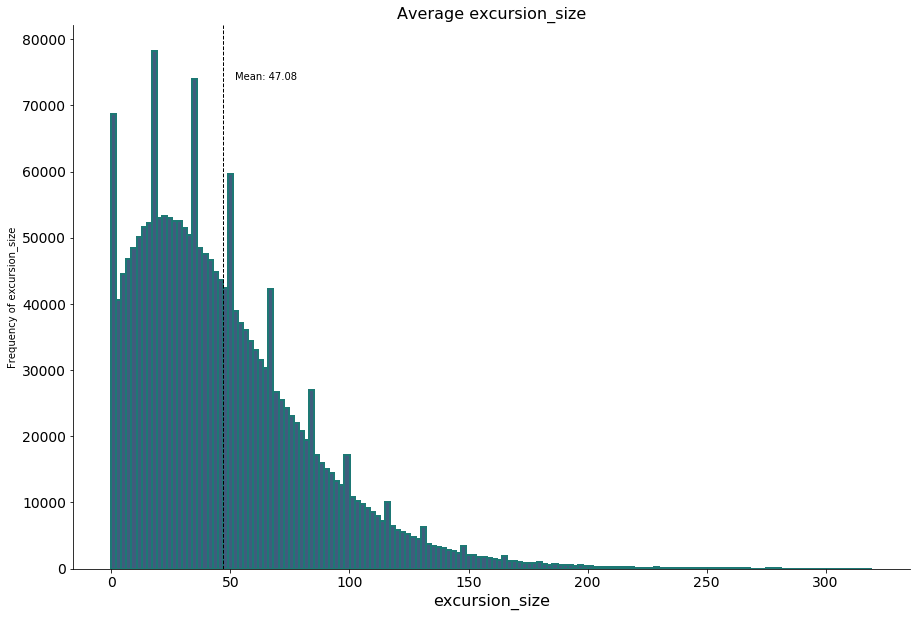

In [44]:
Days=excursion['excursion_size']
plt.figure(figsize=(15, 10)) 
plt.hist(Days, range=(np.min(Days),np.max(Days)),
         linewidth=2,color="#3F5D7D",bins=150, edgecolor='#1d7874')
plt.axvline(Days.mean(), color='k', linestyle='dashed', linewidth=1)
_, max_ = plt.ylim()
plt.text(Days.mean() + Days.mean()/10, 
         max_ - max_/10, 
         'Mean: {:.2f}'.format(Days.mean()))
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.title('Average excursion_size', fontsize=16)
plt.xlabel('excursion_size', fontsize=16)
plt.ylabel('Frequency of excursion_size');

### Distribution of excursion_size by time period

In [45]:
sql_script="""
  (
  SELECT
    pim_id,
    'Sleep (0,6]' AS time_range,
    excursion_size
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    EXTRACT(hour
    FROM
      start_datetime_local)<=6
    AND EXTRACT(hour
    FROM
      start_datetime_local)>0)
UNION ALL (
  SELECT
    pim_id,
    'Morning (6,12]' AS time_range,
    excursion_size
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    EXTRACT(hour
    FROM
      start_datetime_local)<=12
    AND EXTRACT(hour
    FROM
      start_datetime_local)>6
)
UNION ALL (
  SELECT
    pim_id,
    'Afternoon (12,18]' AS time_range,
    excursion_size
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    EXTRACT(hour
    FROM
      start_datetime_local)<=18
    AND EXTRACT(hour
    FROM
      start_datetime_local)>12
)
UNION ALL (
  SELECT
    pim_id,
    'Night (18,24]' AS time_range,
    excursion_size
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    (EXTRACT(hour
      FROM
        start_datetime_local)<=23
      AND EXTRACT(hour
      FROM
        start_datetime_local)>18)
    OR (EXTRACT(hour
      FROM
        start_datetime_local)=0)
)
"""

In [46]:
excursion_time=pd.read_gbq(sql_script,\
                             'research-01-217611', dialect='standard')

In [47]:
excursion_time.head()

,pim_id,time_range,excursion_size
0,1351369,"Night (18,24]",81.0
1,1260928,"Night (18,24]",89.0
2,76388,"Night (18,24]",125.0
3,1261733,"Night (18,24]",88.0
4,1277491,"Night (18,24]",160.0


In [48]:
excursion_time.groupby('time_range')['excursion_size'].mean()

time_range
Afternoon (12,18]    52.754467
Morning (6,12]       46.322526
Night (18,24]        50.838149
Sleep (0,6]          31.840479
Name: excursion_size, dtype: float64

In [49]:
excursion_time.groupby('time_range')['excursion_size'].median()


time_range
Afternoon (12,18]    46.0
Morning (6,12]       40.0
Night (18,24]        43.0
Sleep (0,6]          24.0
Name: excursion_size, dtype: float64

Text(0, 0.5, 'average excursion_size')

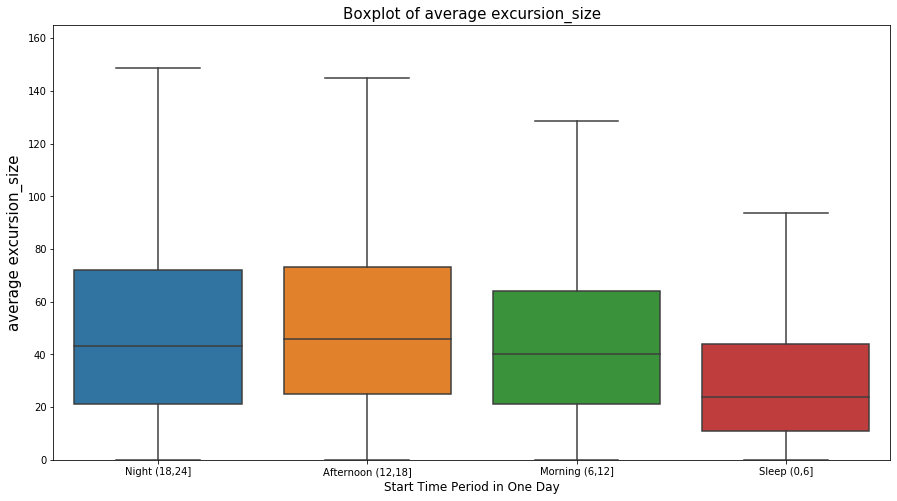

In [52]:
var = 'time_range'
#data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=var, y="excursion_size", data=excursion_time,showfliers=False)
fig.axis(ymin=0, ymax=165);
plt.title('Boxplot of average excursion_size', fontsize=15)
plt.xlabel('Start Time Period in One Day', fontsize=12)
plt.ylabel('average excursion_size',fontsize=15)

### Distribution of excursion rate by time period

In [53]:
sql_script="""
 (
  SELECT
    pim_id,
    'Sleep (0,6]' AS time_range,
    excursion_size/(time_to_peak+0.01) AS excursion_rate
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    EXTRACT(hour
    FROM
      start_datetime_local)<=6
    AND EXTRACT(hour
    FROM
      start_datetime_local)>0
)
UNION ALL (
  SELECT
    pim_id,
    'Morning (6,12]' AS time_range,
    excursion_size/(time_to_peak+0.01) AS excursion_rate
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    EXTRACT(hour
    FROM
      start_datetime_local)<=12
    AND EXTRACT(hour
    FROM
      start_datetime_local)>6)
UNION ALL (
  SELECT
    pim_id,
    'Afternoon (12,18]' AS time_range,
    excursion_size/(time_to_peak+0.01) AS excursion_rate
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    EXTRACT(hour
    FROM
      start_datetime_local)<=18
    AND EXTRACT(hour
    FROM
      start_datetime_local)>12)
UNION ALL (
  SELECT
    pim_id,
    'Night (18,24]' AS time_range,
    excursion_size/(time_to_peak+0.01) AS excursion_rate
  FROM
    odp_level2_feature_store.meal_events
  WHERE
    (EXTRACT(hour
      FROM
        start_datetime_local)<=23
      AND EXTRACT(hour
      FROM
        start_datetime_local)>18)
    OR (EXTRACT(hour
      FROM
        start_datetime_local)=0))
"""

In [54]:
excursion_rate=pd.read_gbq(sql_script,\
                             'research-01-217611', dialect='standard')

In [55]:
excursion_rate.groupby('time_range')['excursion_rate'].mean()


time_range
Afternoon (12,18]    0.872104
Morning (6,12]       0.958672
Night (18,24]        0.834476
Sleep (0,6]          0.654378
Name: excursion_rate, dtype: float64

In [56]:
excursion_rate.groupby('time_range')['excursion_rate'].median()


time_range
Afternoon (12,18]    0.692254
Morning (6,12]       0.777605
Night (18,24]        0.657049
Sleep (0,6]          0.426624
Name: excursion_rate, dtype: float64

Text(0, 0.5, 'average excursion rate')

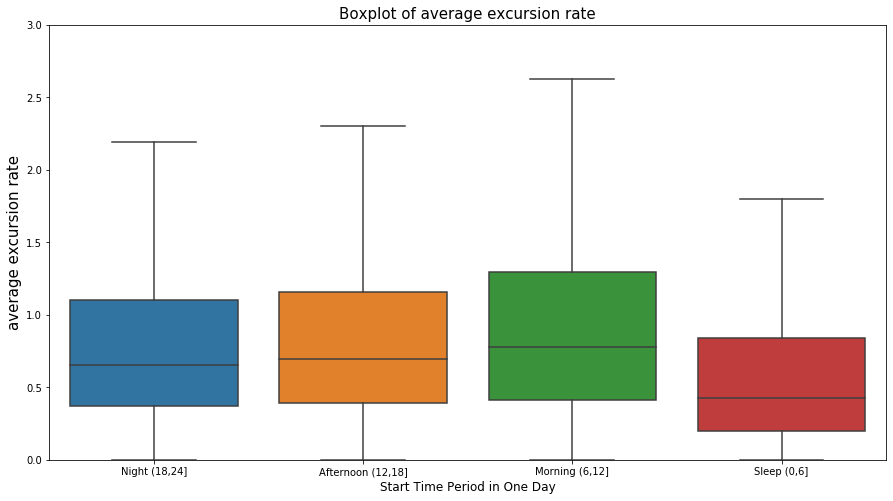

In [59]:
var = 'time_range'
#data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=var, y="excursion_rate", data=excursion_rate,showfliers=False)
fig.axis(ymin=0, ymax=3);
plt.title('Boxplot of average excursion rate', fontsize=15)
plt.xlabel('Start Time Period in One Day', fontsize=12)
plt.ylabel('average excursion rate',fontsize=15)